In [26]:
import pandas as pd
import os, gender_recognation
import seaborn as sns
from gender_recognation.features.wave_file import Wave
from gender_recognation.features.feature_extraction import FeatureExtraction
import pandas_profiling
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
module_path = os.path.dirname(gender_recognation.__file__)
features_path = os.path.join(module_path, 'data', 'csv','features.csv')
df = pd.read_csv(features_path)

In [9]:
df.head()

,Unnamed: 0,path,user_name,gender,mean_freq,std_freq,median_freq,first_q,third_q,range_q,skewness,kurtosis,peak_freq
0,0,/home/hadi/DataProjects/gender-recognition-by-...,rjmunro,male,220.555906,55.486775,244.838709,156.987996,156.987996,112.434487,-0.615178,1.875600,278.476190
1,1,/home/hadi/DataProjects/gender-recognition-by-...,rjmunro,male,198.286837,50.717382,174.263384,159.217319,159.217319,91.728469,0.155002,1.794178,169.454545
2,2,/home/hadi/DataProjects/gender-recognition-by-...,rjmunro,male,207.910304,49.050451,221.658399,171.123725,171.123725,80.072768,-0.296836,2.037258,174.918919
3,3,/home/hadi/DataProjects/gender-recognition-by-...,rjmunro,male,198.778824,46.714481,206.724916,168.287252,168.287252,62.773127,-0.308538,2.442045,228.480000
4,4,/home/hadi/DataProjects/gender-recognition-by-...,rjmunro,male,218.954780,51.573931,236.458228,187.899986,187.899986,70.625114,-0.909896,2.612031,252.965517


In [11]:
df.columns

Index(['Unnamed: 0', 'path', 'user_name', 'gender', 'mean_freq', 'std_freq',
       'median_freq', 'first_q', 'third_q', 'range_q', 'skewness', 'kurtosis',
       'peak_freq'],
      dtype='object')

In [12]:
cols = ['gender', 'mean_freq', 'std_freq','median_freq', 'first_q', 'third_q', 'range_q', 'skewness', 'kurtosis', 'peak_freq']

In [27]:
pandas_profiling.ProfileReport(df[cols])

Number of variables,10
Number of observations,75927
Total Missing (%),0.0%
Total size in memory,5.8 MiB
Average record size in memory,80.0 B
Numeric,6
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


c:\users\hadi\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


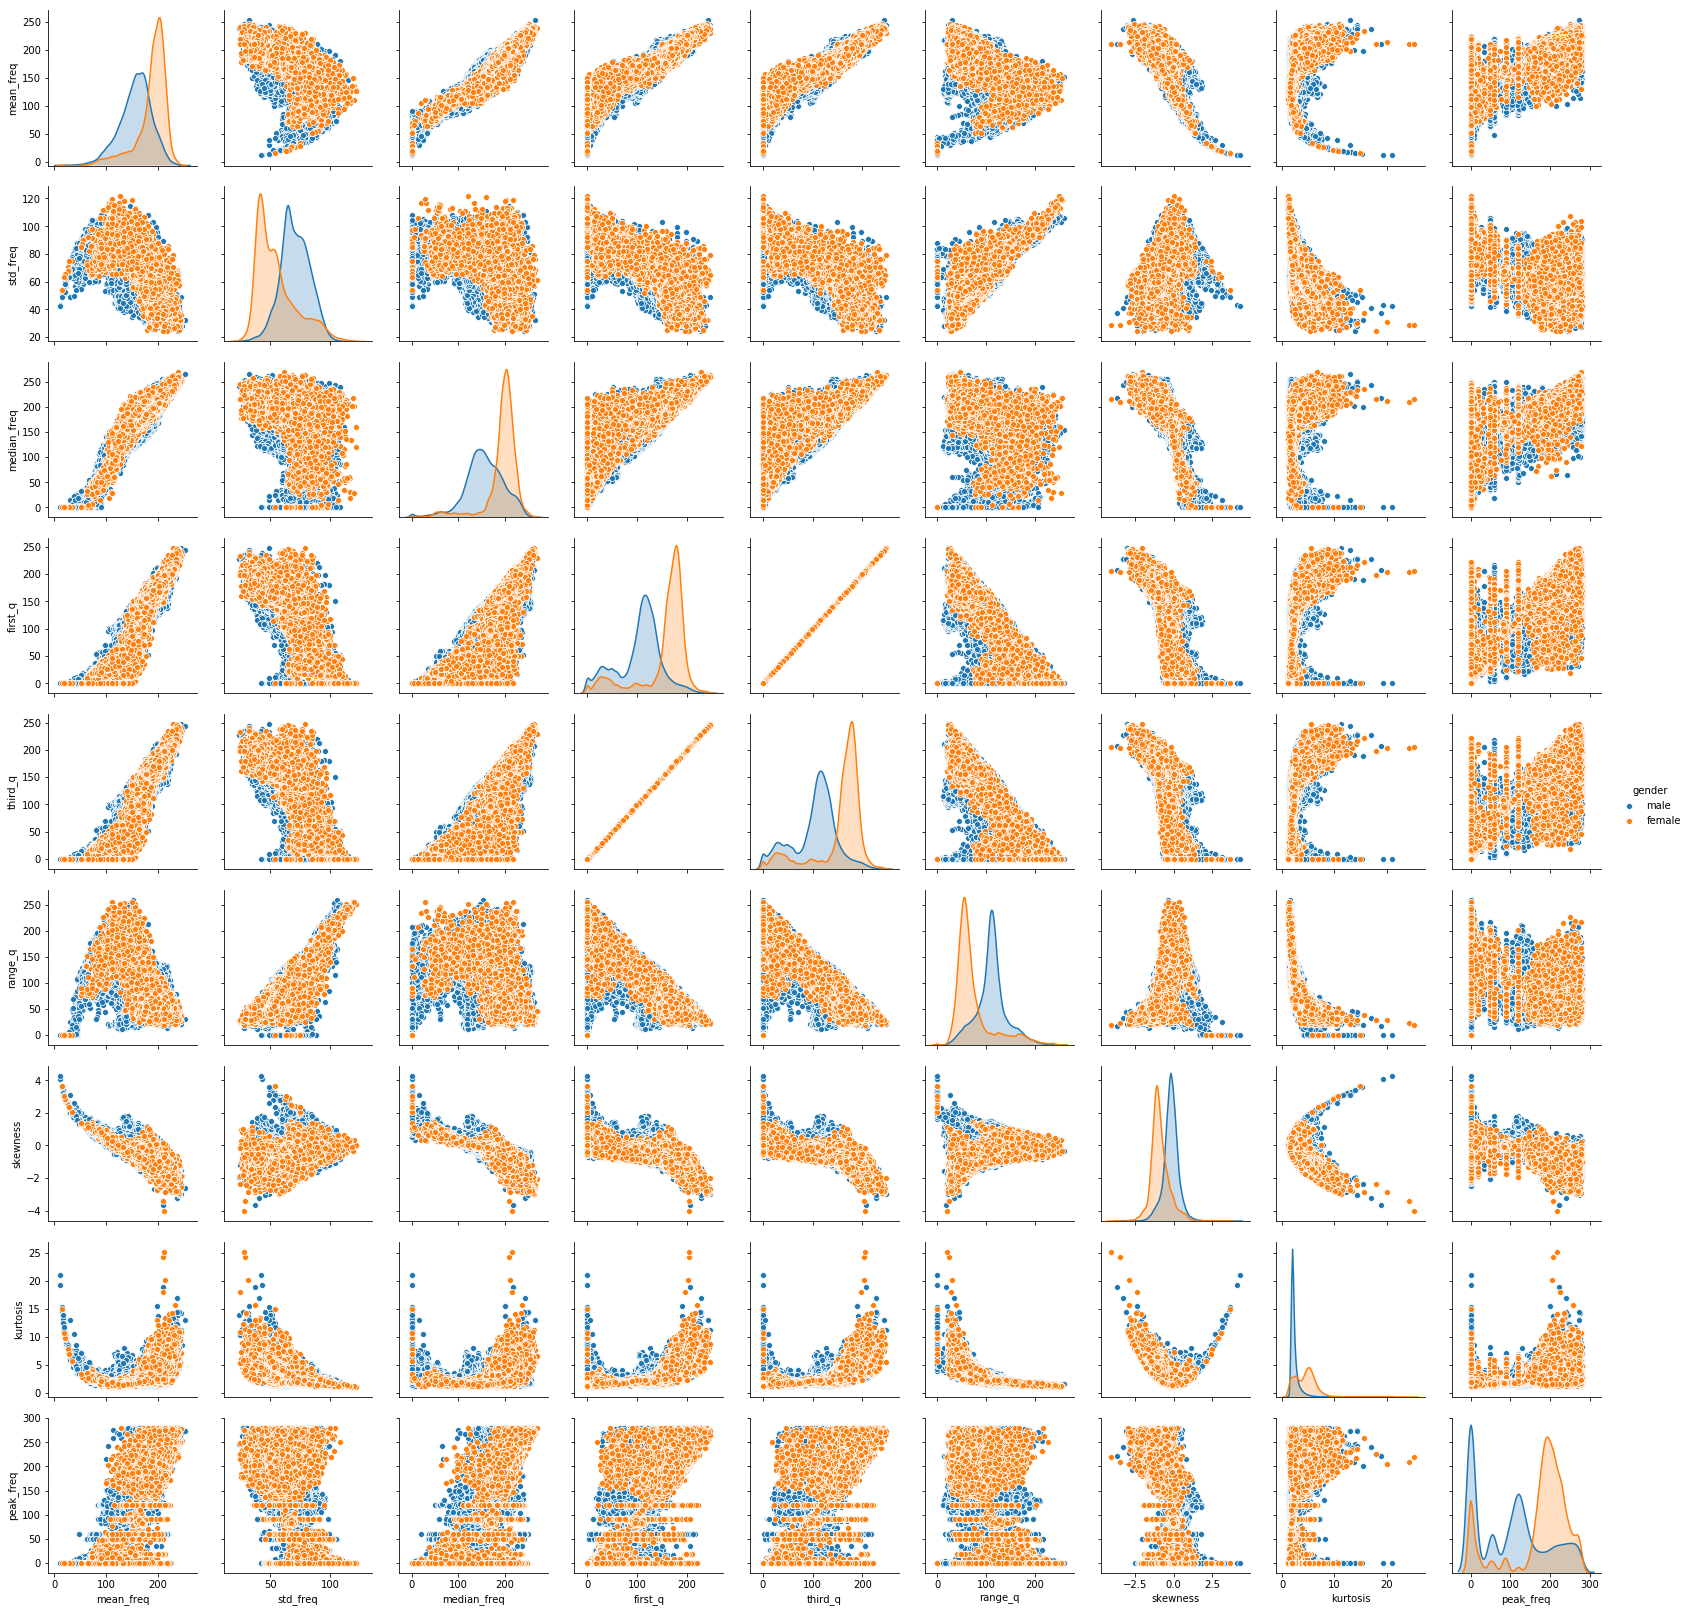

In [13]:
sns.pairplot(df[cols],hue='gender')

In [17]:
f = pd.read_csv(os.path.join(module_path, 'data', 'csv', 'waves.csv'))

In [19]:
def path_to_spectrum(path, LPF=True, cutoff=280):
    snd = Wave.read_wave(path)
    if LPF: snd.low_pass_filter(cutoff=cutoff)
    return snd

In [21]:
snd = path_to_spectrum(f.path.iloc[0])

In [22]:
fe = FeatureExtraction()

In [23]:
fe.first_quantile_f(snd.amps,snd.fs)

99.34084632132921

In [24]:
fe.third_quantile_f(snd.amps,snd.fs)

213.49392433665082